In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
from matplotlib.ticker import FuncFormatter
import statsmodels.api as sm
import numpy as np
from scipy.stats import rankdata

In [ ]:
breast_df = pd.read_csv("../../results/breast_significance_drop_per_tf_degree.csv", index_col=0)
testis_df = pd.read_csv("../../results/testis_significance_drop_per_tf_degree.csv", index_col=0)
kidney_df = pd.read_csv("../../results/kidney_significance_drop_per_tf_degree.csv", index_col=0)
breast_df = pd.read_feather("../../results/breast_approx_100_top1000_targets.feather")
testis_df = pd.read_feather("../../results/testis_approx_100_top1000_targets.feather")
kidney_df = pd.read_feather("../../results/kidney_approx_100_top1000_targets.feather")
precision_df = pd.read_csv("../../results/precision_results_against_collectri.csv")
precision_df = precision_df.replace({"all" : "GRNBoost2", "signif" : "SignifiKANTE"})
breast_df

In [ ]:
fig, axs = plt.subplot_mosaic([['A', 'A', 'B', 'B', 'C'], ['D', 'E', 'F', 'G', 'G']])
fig.set_size_inches(15, 9)
axs_list = list(axs.values())
label_fontsize = 14

sns.scatterplot(data=breast_df, x='Weighted degree per TF', y='#(total edges)/#(signif. edges) per TF', ax=axs['D'])
axs['D'].set_ylabel("#(total edges)/#(signif. edges)", fontsize=label_fontsize)
axs['D'].set_xlabel("Weighted degree", fontsize=label_fontsize)


sns.scatterplot(data=kidney_df, x='Weighted degree per TF', y='#(total edges)/#(signif. edges) per TF', ax=axs['E'])
axs['E'].set_ylabel("")
axs['E'].set_xlabel("Weighted degree", fontsize=label_fontsize)


sns.scatterplot(data=testis_df, x='Weighted degree per TF', y='#(total edges)/#(signif. edges) per TF', ax=axs['F'])
axs['F'].set_ylabel("")
axs['F'].set_xlabel("Weighted degree", fontsize=label_fontsize)

box = sns.boxplot(data=precision_df, x="tissue", y="precision", hue="type", ax=axs['G'], palette="Set2")
box.legend_.set_title(None)
for t in box.legend_.texts:
    t.set_fontsize(label_fontsize)   
axs['G'].tick_params(axis='x', labelsize=label_fontsize)
axs['G'].set_xlabel("")
axs['G'].set_ylabel("Precision", fontsize=label_fontsize)
axs['G'].set_yticks([0.0006, 0.001, 0.0014])
axs['G'].yaxis.set_major_formatter(
    FuncFormatter(lambda y, _: f"{y:.4f}".lstrip('0') if y != 0 else "0")
)

pairs = [
    (("Breast", "GRNBoost2"), ("Breast", "SignifiKANTE")),
    (("Kidney", "GRNBoost2"), ("Kidney", "SignifiKANTE")),
    (("Testis", "GRNBoost2"), ("Testis", "SignifiKANTE"))
]

annotator = Annotator(
    box, pairs,
    data=precision_df,
    x="tissue", y="precision", hue="type"
)

annotator.configure(
    test='Wilcoxon',   # or 'Mann-Whitney', 'Wilcoxon', etc.
    text_format='star',  # can also be 'simple', 'full', or 'pvalue'
           # place annotations above boxes
    comparisons_correction=None
)
annotator.apply_and_annotate()

axs['D'].set_xscale('log')
axs['D'].set_yscale('log')
axs['E'].set_xscale('log')
axs['E'].set_yscale('log')
axs['F'].set_xscale('log')
axs['F'].set_yscale('log')


labels = {'A': 'A', 'B': 'B', 'C': 'C', 'D' : 'D', 'E' : 'E', 'F' : 'F', 'G' : 'G'}

for key, label in labels.items():
    ax = axs[key]
    ax.text(
        -0.1, 1.15, label,  # x, y (in axes fraction coords)
        transform=ax.transAxes,
        fontsize=24,
        fontweight='bold',
        va='top',
        ha='left'
    )
   
fig.tight_layout()
fig.subplots_adjust(hspace=0.25, wspace=0.35)
plt.savefig("precision_accuracy_plot.pdf")

In [10]:
# Plot distribution shifts in TFs.
breast_df = pd.read_feather("../../results/breast_approx_100_top1000_targets.feather")
testis_df = pd.read_feather("../../results/testis_approx_100_top1000_targets.feather")
kidney_df = pd.read_feather("../../results/kidney_approx_100_top1000_targets.feather")
breast_df['importance'] = breast_df['importance'].rank(pct=True, ascending=False) * 100
testis_df['importance'] = testis_df['importance'].rank(pct=True, ascending=False) * 100
kidney_df['importance'] = kidney_df['importance'].rank(pct=True, ascending=False) * 100
precision_df = pd.read_csv("../../results/precision_results_against_collectri.csv")
# Filter significant edges.
#signif_breast = breast_df[breast_df['pvalue_bh']<=0.05].copy()
#signif_testis = testis_df[testis_df['pvalue_bh']<=0.05].copy()
#signif_kidney = kidney_df[kidney_df['pvalue_bh']<=0.05].copy()
#print("Number of signif. edges per TF: ")
#tf_counts_testis = signif_testis['TF'].value_counts()
#print(tf_counts_testis[30:40].index)
precision_df = precision_df.replace({"all" : "GRNBoost2", "signif" : "SignifiKANTE (BH)"})

['ENSG00000141646', 'ENSG00000111727', 'ENSG00000079616', 'ENSG00000154727', 'ENSG00000152670', 'ENSG00000140262', 'ENSG00000242441', 'ENSG00000197170', 'ENSG00000172845', 'ENSG00000099246', 'ENSG00000186812', 'ENSG00000069399', 'ENSG00000167377', 'ENSG00000244687', 'ENSG00000123268', 'ENSG00000123411', 'ENSG00000103343', 'ENSG00000198597', 'ENSG00000171295', 'ENSG00000188283']


/tmp/ipykernel_17660/254243392.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=tf_df, x='importance', y='TF', palette='Set2')


<Axes: xlabel='importance', ylabel='TF'>

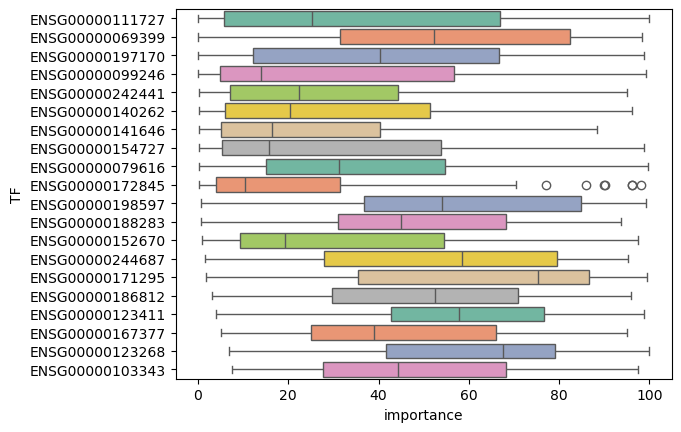

In [3]:
# Plot potentially interesting TFs for selection in distribution plot.
all_tfs = list(set(testis_df['TF']))
sub_tfs = ['ENSG00000141646', 'ENSG00000111727', 'ENSG00000079616',
       'ENSG00000154727', 'ENSG00000152670', 'ENSG00000140262',
       'ENSG00000242441', 'ENSG00000197170', 'ENSG00000172845',
       'ENSG00000099246']+['ENSG00000186812', 'ENSG00000069399', 'ENSG00000167377',
       'ENSG00000244687', 'ENSG00000123268', 'ENSG00000123411',
       'ENSG00000103343', 'ENSG00000198597', 'ENSG00000171295',
       'ENSG00000188283']
print(sub_tfs)
tf_df = testis_df[testis_df['TF'].isin(sub_tfs)]
sns.boxplot(data=tf_df, x='importance', y='TF', palette='Set2')

/tmp/ipykernel_683803/1452179470.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=tf_df, x='pvalue_bh', y='TF', palette='Set2')


<Axes: xlabel='pvalue_bh', ylabel='TF'>

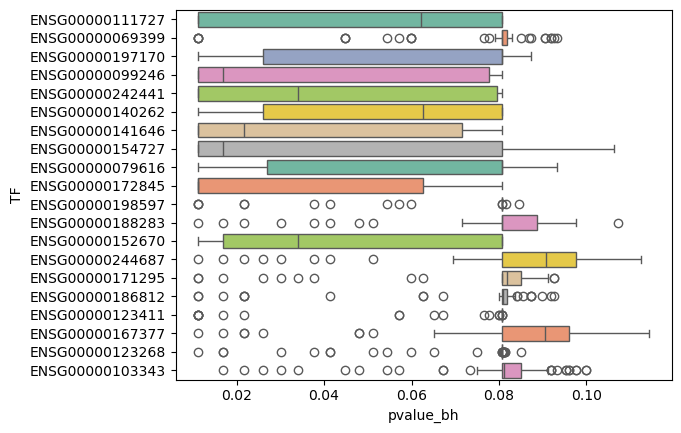

In [86]:
sns.boxplot(data=tf_df, x='pvalue_bh', y='TF', palette='Set2')

Number of edges in significant df: 125


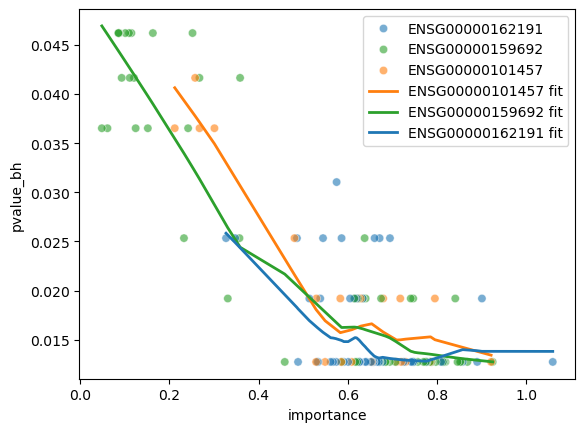

In [91]:
tf1 = "ENSG00000162191"
tf2 = "ENSG00000101457"
tf3 = "ENSG00000159692"
tf4 = ''
tfs = [tf1, tf2, tf3]


# Filter dataframe
sub_df = signif_kidney[signif_kidney['TF'].isin(tfs)]
sub_df = sub_df[sub_df['importance'] <= 1.2]

print("Number of edges in significant df:", len(sub_df))

# Create consistent color palette for the selected TFs
palette = sns.color_palette("tab10", len(tfs))
color_map = dict(zip(tfs, palette))

# Scatter plot with matching colors
sns.scatterplot(
    data=sub_df,
    x="importance",
    y="pvalue_bh",
    hue="TF",
    palette=color_map,
    alpha=0.6
)

# LOWESS smoothed fits per TF
for tf, group in sub_df.groupby("TF"):
    x = group["importance"]
    y = group["pvalue_bh"]
    lowess = sm.nonparametric.lowess(y, x, frac=0.5)

    # Sort LOWESS output for correct line plotting
    lowess = lowess[np.argsort(lowess[:, 0])]

    plt.plot(
        lowess[:, 0],
        lowess[:, 1],
        color=color_map[tf],
        linewidth=2,
        label=f"{tf} fit"
    )

plt.legend()


In [18]:
breast_tfs = ["AVEN", "SMAD2"]
kidney_tfs = ['FIP1L1', 'HDAC2']
testis_tfs = ['GTF2A1L', 'TCF12']
breast_rename = {"ENSG00000169857" : "AVEN", "ENSG00000175387" : "SMAD2"}
kidney_rename = {'ENSG00000145216': "FIP1L1", 'ENSG00000196591' : "HDAC2"}
testis_rename = {'ENSG00000242441' : "GTF2A1L", 'ENSG00000140262' : "TCF12"}
breast_df.replace(breast_rename, inplace=True)
kidney_df.replace(kidney_rename, inplace=True)
testis_df.replace(testis_rename, inplace=True)

sim_precisions = pd.read_csv("../../results/sc_simulated_data/aggregated_metrics.tsv", sep='\t', index_col=0)
sim_precisions = sim_precisions[sim_precisions['data_configuration']=='5_sources']
sim_precisions.replace({'unfiltered' : 'GRNBoost2', r"$\alpha$=0.05" : "SignifiKANTE", r"$\alpha$=0.05 (BH-adj)" : "SignifiKANTE (BH)"}, inplace=True)
sim_jaccards = pd.read_csv("../../results/sc_simulated_data/jaccard_indices.tsv", sep=',', index_col=0)
sim_jaccards.replace({'SignifiKANTE (BH-adj)' : "SignifiKANTE (BH)"}, inplace=True)

sim_grn = pd.read_csv("../../results/sc_simulated_data/5_sources/grn_10.tsv", sep='\t', index_col=0)
sim_grn['importance'] = sim_grn['importance'].rank(pct=True, ascending=False) * 100
#sim_tfs = ['ZNF667', 'MEOX2']
sim_tfs = ['TF1', 'TF2']
sim_rename = {'NKX3-1' : 'TF1', 'ZNF667' : "TF2"}
sim_grn.replace(sim_rename, inplace=True)

print(sim_jaccards)

     top_n  thresholds  jaccard_index  net_counter               type
0        2           1       1.000000            0  SignifiKANTE (BH)
1        2           1       1.000000            0       SignifiKANTE
2        5           2       1.000000            0  SignifiKANTE (BH)
3        5           2       1.000000            0       SignifiKANTE
4        8           3       1.000000            0  SignifiKANTE (BH)
..     ...         ...            ...          ...                ...
375   5101          80       0.700451            9       SignifiKANTE
376   5739          90       0.526747            9  SignifiKANTE (BH)
377   5739          90       0.622582            9       SignifiKANTE
378   6377         100       0.474047            9  SignifiKANTE (BH)
379   6377         100       0.560295            9       SignifiKANTE

[1140 rows x 5 columns]


<Axes: xlabel='p_adj', ylabel='TF'>

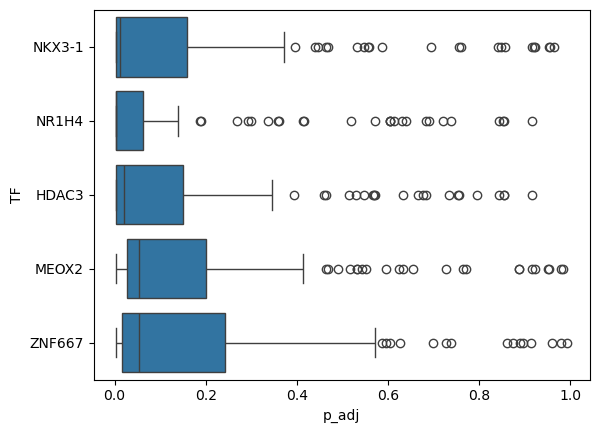

In [128]:
sns.boxplot(data=sim_grn, x='p_adj', y='TF')

<Axes: xlabel='importance', ylabel='TF'>

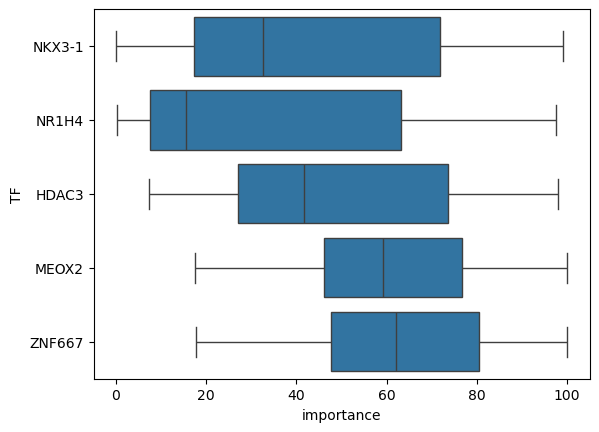

In [129]:
sns.boxplot(data=sim_grn, x='importance', y='TF')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Kidney_GRNBoost2 vs. Kidney_SignifiKANTE (BH): Wilcoxon test (paired samples), P_val:9.766e-03 Stat=3.000e+00
Breast_GRNBoost2 vs. Breast_SignifiKANTE (BH): Wilcoxon test (paired samples), P_val:1.953e-03 Stat=0.000e+00
Testis_GRNBoost2 vs. Testis_SignifiKANTE (BH): Wilcoxon test (paired samples), P_val:3.711e-02 Stat=7.000e+00


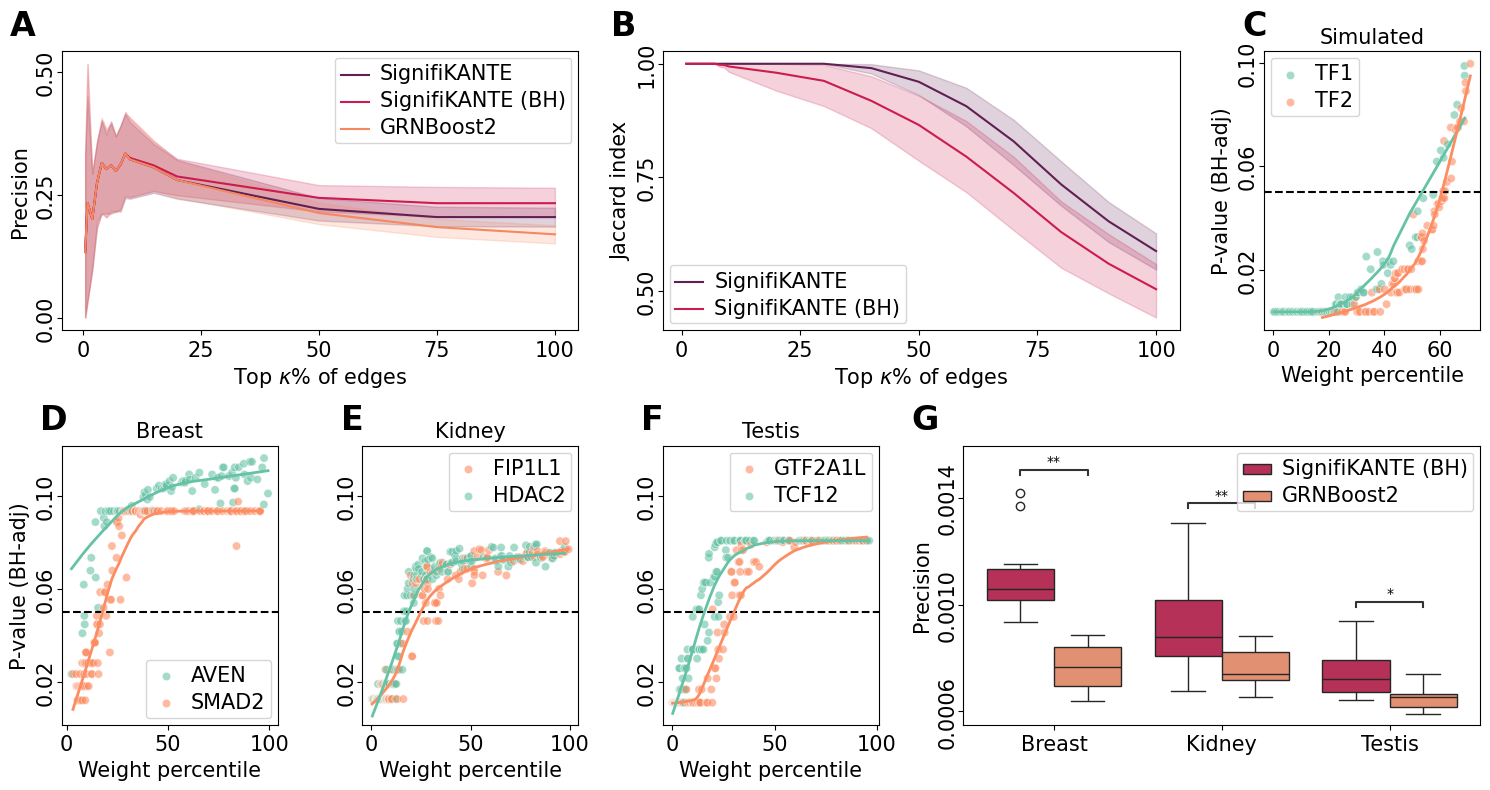

In [20]:
fig, axs = plt.subplot_mosaic([['A', 'A', 'B', 'B', 'C'], ['D', 'E', 'F', 'G', 'G']])
fig.set_size_inches(15, 8)
plt.subplots_adjust(wspace=0.1, hspace=0.25)
axs_list = list(axs.values())
label_fontsize = 15

# Set common colorbar for matching subplots.
all_types = ['SignifiKANTE', 'SignifiKANTE (BH)', 'GRNBoost2']
common_palette = sns.color_palette("rocket", len(all_types))
palette_dict = dict(zip(all_types, common_palette))

### Precision and Jaccard distance plots.
palette = sns.color_palette("rocket", 3)
line = sns.lineplot(data=sim_precisions, x='thresholds', y='Precision', hue='comparison', palette=palette_dict, ax=axs['A'], hue_order=all_types)
axs['A'].set_xlabel(r"Top $\kappa$% of edges", fontsize=label_fontsize)
axs['A'].set_ylabel(r"Precision", fontsize=label_fontsize)
axs['A'].legend().set_title(None)
for t in line.legend_.texts:
    t.set_fontsize(label_fontsize)
axs['A'].set_yticks([0.0, 0.25, 0.5])
axs['A'].set_xticks([0, 25, 50, 75, 100])
axs['A'].tick_params(axis='x', labelsize=label_fontsize)
axs['A'].tick_params(axis='y', labelsize=label_fontsize, rotation=90, pad=8)
for label in axs['A'].get_yticklabels():
    label.set_verticalalignment('center')  # move “up” relative to the tick
    label.set_horizontalalignment('center')
    label.set_fontsize(label_fontsize)   

palette = sns.color_palette("rocket", 2)
line = sns.lineplot(data=sim_jaccards, x='thresholds', y='jaccard_index', hue='type', palette=palette_dict, ax=axs['B'], hue_order=['SignifiKANTE', 'SignifiKANTE (BH)'])
axs['B'].set_xlabel(r"Top $\kappa$% of edges", fontsize=label_fontsize)
axs['B'].set_ylabel(r"Jaccard index", fontsize=label_fontsize)
axs['B'].legend().set_title(None)
for t in line.legend_.texts:
    t.set_fontsize(label_fontsize)   
axs['B'].set_yticks([0.5, 0.75, 1.0])
axs['B'].set_xticks([0, 25, 50, 75, 100])
axs['B'].tick_params(axis='x', labelsize=label_fontsize)
axs['B'].tick_params(axis='y', labelsize=label_fontsize, rotation=90, pad=8)
for label in axs['B'].get_yticklabels():
    label.set_verticalalignment('center')  # move “up” relative to the tick
    label.set_horizontalalignment('center')
    label.set_fontsize(label_fontsize) 
    
### Pvalue importance plot for simulated GRN.
sim_sub = sim_grn[sim_grn['TF'].isin(sim_tfs)]
sim_sub = sim_sub[sim_sub['p_adj']<=0.1]
#sim_sub['importance'] = sim_sub['importance'].rank(pct=True) * 100
#sim_sub['importance'] = sim_sub.groupby('TF')['importance'].transform(
#    lambda x: rankdata(x, method='average') / len(x) * 100
#)
#sim_sub = sim_sub[sim_sub['importance']<=1.0]
sim_palette = sns.color_palette("Set2", len(sim_tfs))
color_map = dict(zip(sim_tfs, sim_palette))

# Scatter plot with matching colors
scatter = sns.scatterplot(
    data=sim_sub,
    x="importance",
    y="p_adj",
    hue="TF",
    palette=color_map,
    alpha=0.6,
    ax=axs['C'],
    legend=True
)
axs['C'].axhline(y=0.05, color='black', linestyle='--', linewidth=1.5)
axs['C'].set_ylabel("P-value (BH-adj)", fontsize=label_fontsize)
axs['C'].set_xlabel("Weight percentile", fontsize=label_fontsize)
axs['C'].set_xticks([0, 20, 40, 60])
axs['C'].set_yticks([0.02, 0.06, 0.1])
axs['C'].set_title("Simulated", fontsize=label_fontsize)
axs['C'].tick_params(axis='y', labelrotation=90, labelsize=label_fontsize, pad=8)
axs['C'].tick_params(axis='x', labelsize=label_fontsize)
scatter.get_legend().set_title("")
for text in scatter.get_legend().get_texts():
    text.set_fontsize(label_fontsize)  # or any numeric size you prefer
for label in axs['C'].get_yticklabels():
    label.set_verticalalignment('center')  # move “up” relative to the tick
    label.set_horizontalalignment('center')
    label.set_fontsize(label_fontsize)


# ---- LOWESS smoothed fits per TF ----
for tf, group in sim_sub.groupby("TF"):
    x = group["importance"]
    y = group["p_adj"]

    # Skip if too few points for smoothing
    if len(group) < 3:
        continue

    # Compute LOWESS smoothing (frac controls smoothness)
    lowess = sm.nonparametric.lowess(y, x, frac=0.5)
    lowess = lowess[np.argsort(lowess[:, 0])]  # ensure sorted x for plotting

    # Plot smoothed line on the same axes
    axs['C'].plot(
        lowess[:, 0],
        lowess[:, 1],
        color=color_map[tf],
        linewidth=2,
        label=f"{tf} (LOWESS)"
    )

### Pvalue - importance plots for Breast.
breast_sub = breast_df[breast_df['TF'].isin(breast_tfs)]
breast_palette = sns.color_palette("Set2", len(breast_tfs))
color_map = dict(zip(breast_tfs, breast_palette))

# Scatter plot with matching colors
scatter = sns.scatterplot(
    data=breast_sub,
    x="importance",
    y="pvalue_bh",
    hue="TF",
    palette=color_map,
    alpha=0.6,
    ax=axs['D'],
    legend=True
)
axs['D'].axhline(y=0.05, color='black', linestyle='--', linewidth=1.5)
axs['D'].set_ylabel("P-value (BH-adj)", fontsize=label_fontsize)
axs['D'].set_xlabel("Weight percentile", fontsize=label_fontsize)
axs['D'].set_title("Breast", fontsize=label_fontsize)
axs['D'].tick_params(axis='y', labelrotation=90, pad=8)
axs['D'].tick_params(axis='x', labelsize=label_fontsize)
scatter.get_legend().set_title("")
for text in scatter.get_legend().get_texts():
    text.set_fontsize(label_fontsize)  # or any numeric size you prefer

for label in axs['D'].get_yticklabels():
    label.set_verticalalignment('center')  # move “up” relative to the tick
    label.set_horizontalalignment('center')
    label.set_fontsize(label_fontsize)



# ---- LOWESS smoothed fits per TF ----
for tf, group in breast_sub.groupby("TF"):
    x = group["importance"]
    y = group["pvalue_bh"]

    # Skip if too few points for smoothing
    if len(group) < 3:
        continue

    # Compute LOWESS smoothing (frac controls smoothness)
    lowess = sm.nonparametric.lowess(y, x, frac=0.5)
    lowess = lowess[np.argsort(lowess[:, 0])]  # ensure sorted x for plotting

    # Plot smoothed line on the same axes
    axs['D'].plot(
        lowess[:, 0],
        lowess[:, 1],
        color=color_map[tf],
        linewidth=2,
        label=f"{tf} (LOWESS)"
    )

### Kidney
kidney_sub = kidney_df[kidney_df['TF'].isin(kidney_tfs)]
kidney_palette = sns.color_palette("Set2", len(kidney_tfs))
color_map = dict(zip(kidney_tfs[::-1], kidney_palette))

# Scatter plot with matching colors
scatter = sns.scatterplot(
    data=kidney_sub,
    x="importance",
    y="pvalue_bh",
    hue="TF",
    palette=color_map,
    alpha=0.6,
    ax=axs['E'],
    legend=True
)
axs['E'].axhline(y=0.05, color='black', linestyle='--', linewidth=1.5)
axs['E'].set_ylabel("", fontsize=label_fontsize)
axs['E'].set_xlabel("Weight percentile", fontsize=label_fontsize)
axs['E'].set_title("Kidney", fontsize=label_fontsize)
#axs['E'].set_ylim(0.009, 0.05)  # make sure 0.045 is within the visible range
axs['E'].tick_params(axis='y', labelrotation=90, labelsize=label_fontsize, pad=8)
axs['E'].tick_params(axis='x', labelsize=label_fontsize)
scatter.get_legend().set_title("")
for text in scatter.get_legend().get_texts():
    text.set_fontsize(label_fontsize)  # or any numeric size you prefer

for label in axs['E'].get_yticklabels():
    label.set_verticalalignment('center')  # move “up” relative to the tick
    label.set_horizontalalignment('center')
    label.set_fontsize(label_fontsize)

# ---- LOWESS smoothed fits per TF ----
for tf, group in kidney_sub.groupby("TF"):
    x = group["importance"]
    y = group["pvalue_bh"]

    # Skip if too few points for smoothing
    if len(group) < 3:
        continue

    # Compute LOWESS smoothing (frac controls smoothness)
    lowess = sm.nonparametric.lowess(y, x, frac=0.5)
    lowess = lowess[np.argsort(lowess[:, 0])]  # ensure sorted x for plotting

    # Plot smoothed line on the same axes
    axs['E'].plot(
        lowess[:, 0],
        lowess[:, 1],
        color=color_map[tf],
        linewidth=2,
        label=f"{tf} (LOWESS)"
    )

### Testis.
testis_sub = testis_df[testis_df['TF'].isin(testis_tfs)]
testis_palette = sns.color_palette("Set2", len(testis_tfs))
color_map = dict(zip(testis_tfs[::-1], testis_palette))

# Scatter plot with matching colors
scatter = sns.scatterplot(
    data=testis_sub,
    x="importance",
    y="pvalue_bh",
    hue="TF",
    palette=color_map,
    alpha=0.6,
    ax=axs['F'],
    legend=True
)
axs['F'].axhline(y=0.05, color='black', linestyle='--', linewidth=1.5)
axs['F'].set_ylabel("", fontsize=label_fontsize)
axs['F'].set_xlabel("Weight percentile", fontsize=label_fontsize)
axs['F'].set_title("Testis", fontsize=label_fontsize)
axs['F'].tick_params(axis='y', labelrotation=90, labelsize=label_fontsize, pad=8)
axs['F'].tick_params(axis='x', labelsize=label_fontsize)
scatter.get_legend().set_title("")

for text in scatter.get_legend().get_texts():
    text.set_fontsize(label_fontsize)  # or any numeric size you prefer

for label in axs['F'].get_yticklabels():
    label.set_verticalalignment('center')  # move “up” relative to the tick
    label.set_horizontalalignment('center')
    label.set_fontsize(label_fontsize)

    
# Align D,E,F on y-axis.
ymin = min(axs['D'].get_ylim()[0], axs['E'].get_ylim()[0], axs['F'].get_ylim()[0])
ymax = max(axs['D'].get_ylim()[1], axs['E'].get_ylim()[1], axs['F'].get_ylim()[1])

# Apply same y-limits to all
for ax in [axs['D'], axs['E'], axs['F']]:
    ax.set_ylim(ymin, ymax)
    ax.set_yticks([0.02, 0.06, 0.1])  # or whatever tick positions you want


# ---- LOWESS smoothed fits per TF ----
for tf, group in testis_sub.groupby("TF"):
    x = group["importance"]
    y = group["pvalue_bh"]

    # Skip if too few points for smoothing
    if len(group) < 3:
        continue

    # Compute LOWESS smoothing (frac controls smoothness)
    lowess = sm.nonparametric.lowess(y, x, frac=0.5)
    lowess = lowess[np.argsort(lowess[:, 0])]  # ensure sorted x for plotting

    # Plot smoothed line on the same axes
    axs['F'].plot(
        lowess[:, 0],
        lowess[:, 1],
        color=color_map[tf],
        linewidth=2,
        label=f"{tf} (LOWESS)"
    )

box = sns.boxplot(data=precision_df, x="tissue", y="precision", hue="type", ax=axs['G'], palette=palette_dict, hue_order=['SignifiKANTE (BH)', 'GRNBoost2'])
box.legend_.set_title(None)
for t in box.legend_.texts:
    t.set_fontsize(label_fontsize)   
axs['G'].tick_params(axis='x', labelsize=label_fontsize)
axs['G'].set_xlabel("")
axs['G'].set_ylabel("Precision", fontsize=label_fontsize)
axs['G'].set_yticks([0.0006, 0.001, 0.0014])
axs['G'].tick_params(axis='y', labelrotation=90, labelsize=label_fontsize, pad=8)
axs['G'].tick_params(axis='x', labelsize=label_fontsize)
for label in axs['G'].get_yticklabels():
    label.set_verticalalignment('center')  # move “up” relative to the tick
    label.set_horizontalalignment('center')
    label.set_fontsize(label_fontsize)

pairs = [
    (("Breast", "GRNBoost2"), ("Breast", "SignifiKANTE (BH)")),
    (("Kidney", "GRNBoost2"), ("Kidney", "SignifiKANTE (BH)")),
    (("Testis", "GRNBoost2"), ("Testis", "SignifiKANTE (BH)"))
]

annotator = Annotator(
    box, pairs,
    data=precision_df,
    x="tissue", y="precision", hue="type"
)

annotator.configure(
    test='Wilcoxon',   # or 'Mann-Whitney', 'Wilcoxon', etc.
    text_format='star',  # can also be 'simple', 'full', or 'pvalue'
           # place annotations above boxes
    comparisons_correction=None
)
annotator.apply_and_annotate()


labels = {'A': 'A', 'B': 'B', 'C': 'C', 'D' : 'D', 'E' : 'E', 'F' : 'F', 'G' : 'G'}

for key, label in labels.items():
    ax = axs[key]
    ax.text(
        -0.1, 1.15, label,  # x, y (in axes fraction coords)
        transform=ax.transAxes,
        fontsize=24,
        fontweight='bold',
        va='top',
        ha='left'
    )
   
fig.tight_layout()
plt.savefig("precision_accuracy_plot.pdf")
